# User-Interface for Res-IRF
The Res-IRF model is a tool for simulating energy consumption for space heating in the French residential sector.

Its main characteristic is to integrate a detailed description of the energy performance of the dwelling stock with a rich description of household behaviour.

This notebook is an example of post-treatment.

Variable used by this notebook:
- cost intangible (to be done)
- cost construction
- cost envelope
- stock segmented
- stock construction segmented
- consumption

In [4]:
import os

print(os.getcwd())
# os.chdir(os.path.join(os.getcwd(), '..'))
# print(os.getcwd())

/Users/lucas/PycharmProjects/Res-IRF


In [5]:
import pickle
from ui_utils import *
import matplotlib.pyplot as plt

from parse_input import colors_dict

**User need to enter folder's name:**

In [6]:
name_folder = '20210604_094019'

## Reading input

In [7]:
folder_output = os.path.join(os.getcwd(), 'project', 'output', name_folder)
print('Output will be taken from: {}'.format(folder_output))
folder_output_pkl = os.path.join(folder_output, 'output_pkl')

folder_detailed = os.path.join(folder_output, 'detailed')
folder_detailed_pkl = os.path.join(folder_detailed, 'pkl')

var_list = [
    'cost_intangible',
    'cost_construction',
    'cost_envelope',
    'stock_segmented',
    'stock_construction_segmented'
]
var_dict = {}
for key in var_list:
    name_file = os.path.join(folder_output_pkl, '{}.pkl'.format(key))
    with open(name_file, 'rb') as handle:
        var_dict[key] = pickle.load(handle)
        print('Reading: {}'.format(name_file))
        
var_detailed_dict = [
    'consumption_actual',
    'consumption_conventional',
    'consumption_final',
    'flow_renovation_label_energy_dict',
    'energy_cash_flows',
    'energy_lcc',
    'energy_lcc_final',
    'subsidies_detailed',
    'subsidies_total',
    'capex_total',
    'energy_saving',
    'emission_saving',
    'energy_saving_lc',
    'emission_saving_lc'
]
for key in var_detailed_dict:
    name_file = os.path.join(folder_detailed_pkl, '{}.pkl'.format(key))
    with open(name_file, 'rb') as handle:
        var_dict[key] = pickle.load(handle)
        print('Reading: {}'.format(name_file))

       


Output will be taken from: /Users/lucas/PycharmProjects/Res-IRF/project/output/20210604_094019
Reading: /Users/lucas/PycharmProjects/Res-IRF/project/output/20210604_094019/output_pkl/cost_intangible.pkl
Reading: /Users/lucas/PycharmProjects/Res-IRF/project/output/20210604_094019/output_pkl/cost_construction.pkl
Reading: /Users/lucas/PycharmProjects/Res-IRF/project/output/20210604_094019/output_pkl/cost_envelope.pkl
Reading: /Users/lucas/PycharmProjects/Res-IRF/project/output/20210604_094019/output_pkl/stock_segmented.pkl
Reading: /Users/lucas/PycharmProjects/Res-IRF/project/output/20210604_094019/output_pkl/stock_construction_segmented.pkl
Reading: /Users/lucas/PycharmProjects/Res-IRF/project/output/20210604_094019/detailed/pkl/consumption_actual.pkl
Reading: /Users/lucas/PycharmProjects/Res-IRF/project/output/20210604_094019/detailed/pkl/consumption_conventional.pkl
Reading: /Users/lucas/PycharmProjects/Res-IRF/project/output/20210604_094019/detailed/pkl/consumption_final.pkl
Reading:

In [8]:
l = [f for f in os.listdir(folder_detailed) if f.split('_')[0] == 'result']
for f in l:
    name_file = os.path.join(folder_detailed, f)
    var_dict[f.split('.')[0]] = pd.read_csv(name_file, index_col=[0, 1, 2, 3, 4, 5, 6, 7], header=[0])
    print('Reading: {}'.format(name_file))

Reading: /Users/lucas/PycharmProjects/Res-IRF/project/output/20210604_094019/detailed/result_euro_2020.csv
Reading: /Users/lucas/PycharmProjects/Res-IRF/project/output/20210604_094019/detailed/result_euro_2021.csv
Reading: /Users/lucas/PycharmProjects/Res-IRF/project/output/20210604_094019/detailed/result_euro_2019.csv
Reading: /Users/lucas/PycharmProjects/Res-IRF/project/output/20210604_094019/detailed/result_unit_2020.csv
Reading: /Users/lucas/PycharmProjects/Res-IRF/project/output/20210604_094019/detailed/result_unit_2021.csv
Reading: /Users/lucas/PycharmProjects/Res-IRF/project/output/20210604_094019/detailed/result_unit_2019.csv


## Initial dwelling stock

## Evolution of dwelling stock
Res-IRF considers stock dynamics. Buildings demolition, construction and renovation.

### Dwellings stocks by Energy performance

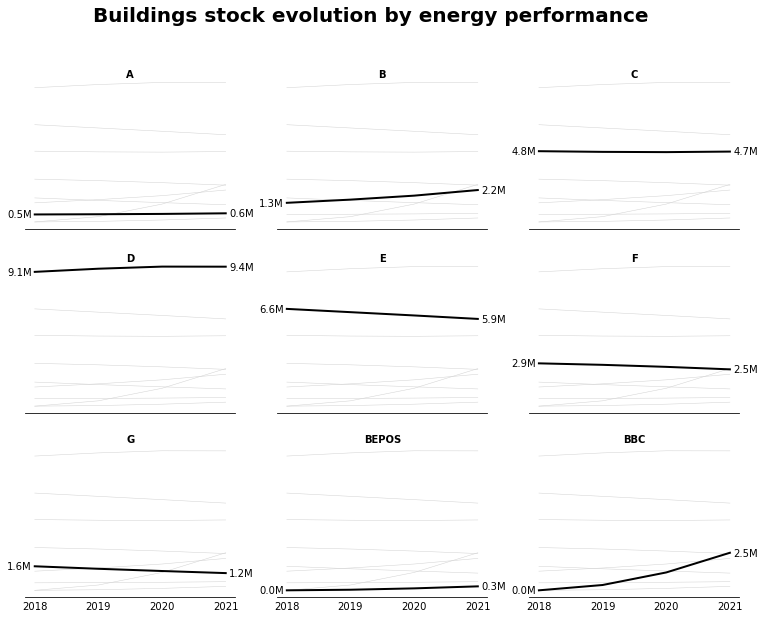

In [9]:
df = pd.concat((var_dict['stock_segmented'], var_dict['stock_construction_segmented']), axis=0)
df_ep = df.groupby(['Energy performance']).sum()
df_ep = df_ep.loc[['A', 'B', 'C', 'D', 'E', 'F', 'G', 'BEPOS', 'BBC']]
economic_subplots(df_ep, 'Buildings stock evolution by energy performance',
                  format_axtitle=lambda x: x, format_val=lambda x: '{:.1f}M'.format(x / 1000000))

### Dwellings stocks by Heating energy

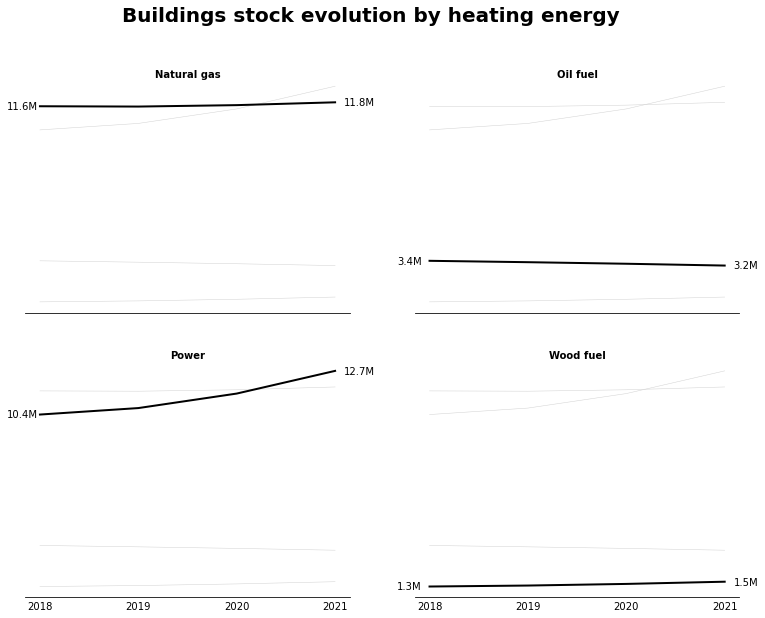

In [10]:
df_ep = df.groupby(['Heating energy']).sum()
economic_subplots(df_ep, 'Buildings stock evolution by heating energy',
                  format_axtitle=lambda x: x, format_val=lambda x: '{:.1f}M'.format(x / 1000000), n_columns=2)

### Renovation done

## Energy consumption
Thanks to renovation, demolition and construction, energy consumption tends to decrease over time in the reference case.
Energy consumption actual considers human behavior.

In [11]:
consumption_actual = var_dict['stock_segmented'] * var_dict['consumption_actual']
consumption_actual.dropna(axis=1, how='any', inplace=True)

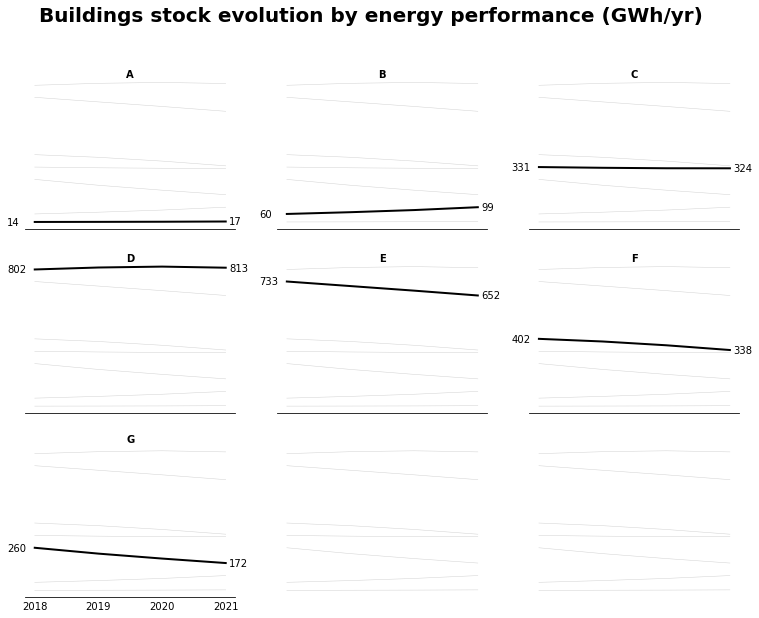

In [12]:
consumption_actual_ep = consumption_actual.groupby('Energy performance').sum()
economic_subplots(consumption_actual_ep, 'Buildings stock evolution by energy performance (GWh/yr)',
                  format_axtitle=lambda x: x, format_val=lambda x: '{:.0f}'.format(x / 1000000))

## Capex
Learning-by-doing and information acceleration tends to decrease transition costs.

### Renovation cost

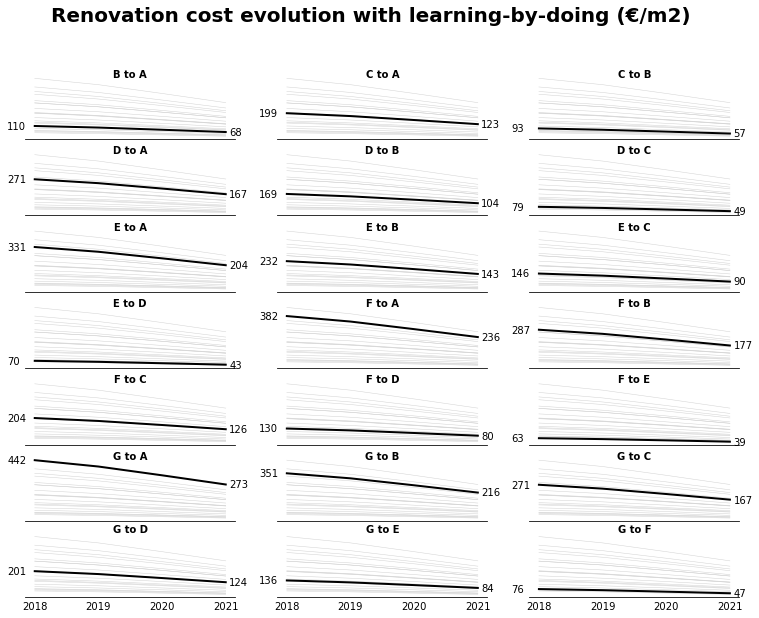

In [13]:
economic_subplots(var_dict['cost_envelope'], 'Renovation cost evolution with learning-by-doing (€/m2)',
                  format_axtitle=lambda x: '{} to {}'.format(x[0], x[1]), format_val=lambda x: '{:.0f}'.format(x))

### Intangible cost

In [14]:
grouped_ep = var_dict['cost_intangible'].groupby(['Energy performance', 'Energy performance final'])
cost_intangible_ep = grouped_ep.mean()

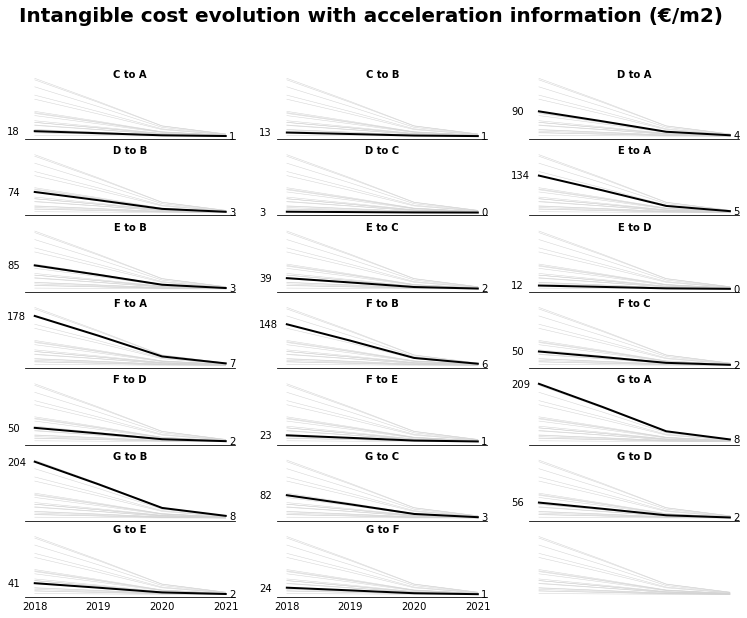

In [15]:
economic_subplots(cost_intangible_ep, 'Intangible cost evolution with acceleration information (€/m2)',
                  format_axtitle=lambda x: '{} to {}'.format(x[0], x[1]), format_val=lambda x: '{:.0f}'.format(x))

In [16]:
# grouped_ep.boxplot(subplots=True)

### Construction cost

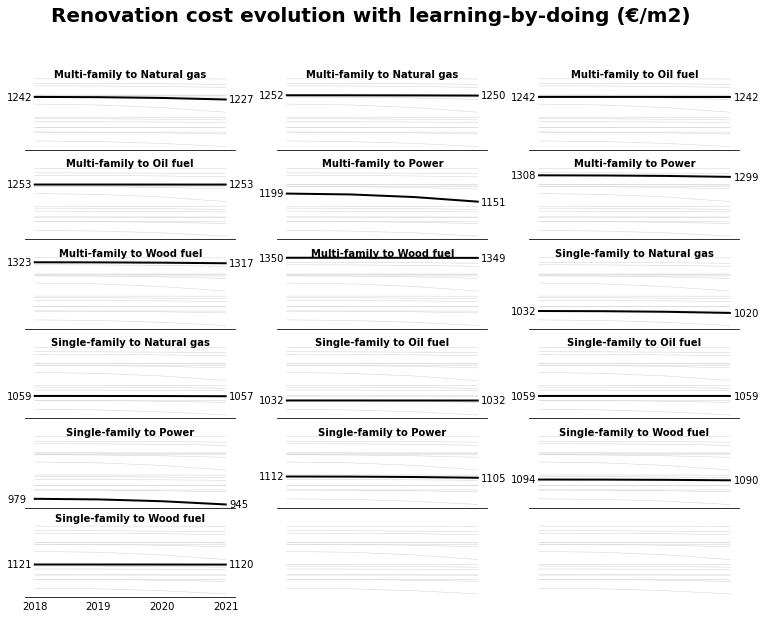

In [17]:
economic_subplots(var_dict['cost_construction'], 'Renovation cost evolution with learning-by-doing (€/m2)',
                  format_axtitle=lambda x: '{} to {}'.format(x[0], x[1]), format_val=lambda x: '{:.0f}'.format(x))

## Total costs
Macro-economic costs: total investment, private investment and public investment.

In [31]:
data = pd.read_csv(os.path.join(folder_output, 'financials_dict.csv'), index_col=[0])
data.index

Index(['Consumption actual', 'Emission actual', 'Total number of renovations',
       'Investment macro', 'Subsidies macro', 'Energy taxes',
       'Private investment macro', 'Emission saving', 'Energy saving'],
      dtype='object')

In [32]:
# gCO2/yr --> tCO2/yr
data.loc['Emission saving', :] = data.loc['Emission saving', :] / 1000000
data.loc['Emission actual', :] = data.loc['Emission actual', :] / 1000000


# kWh/yr --> GWh/yr
data.loc['Energy saving', :] = data.loc['Energy saving', :] / 1000000
data.loc['Consumption actual', :] = data.loc['Consumption actual', :] / 1000000

In [35]:
data

,2019,2020,2021
Consumption actual,2.205810e+05,2.147893e+05,2.081416e+05
Emission actual,4.159387e+07,4.011817e+07,3.848039e+07
Total number of renovations,6.211076e+05,6.926945e+05,8.158700e+05
Investment macro,7.554587e+09,7.837070e+09,8.010949e+09
Subsidies macro,3.307284e+09,3.521840e+09,3.727249e+09
Energy taxes,1.023563e+09,1.021579e+09,9.994051e+08
Private investment macro,4.247302e+09,4.315230e+09,4.283700e+09
Emission saving,1.191344e+06,1.139240e+06,1.089425e+06
Energy saving,7.791023e+03,7.482176e+03,7.185556e+03


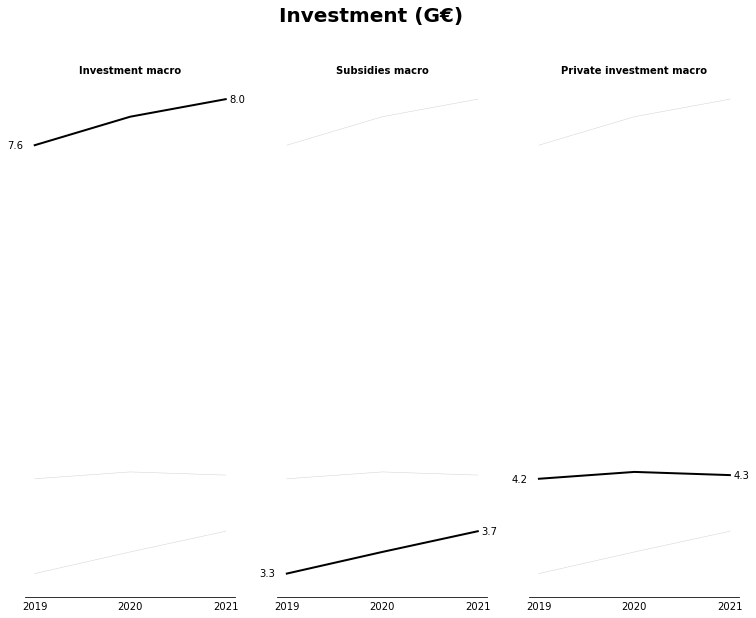

In [28]:
economic_subplots(data.loc[['Investment macro', 'Subsidies macro', 'Private investment macro',], :], 'Investment (G€)', format_val=lambda x: '{:.1f}'.format(x/1000000000))

### Subsidies

In [18]:
financials_unit = var_dict['result_unit_2019'] 
financials_euro = var_dict['result_euro_2019'] 

In [22]:
name_file = os.path.join(folder_detailed, 'subsidies_detailed.pkl')
with open(name_file, 'rb') as handle:
    subsidies_detailed = pickle.load(handle)

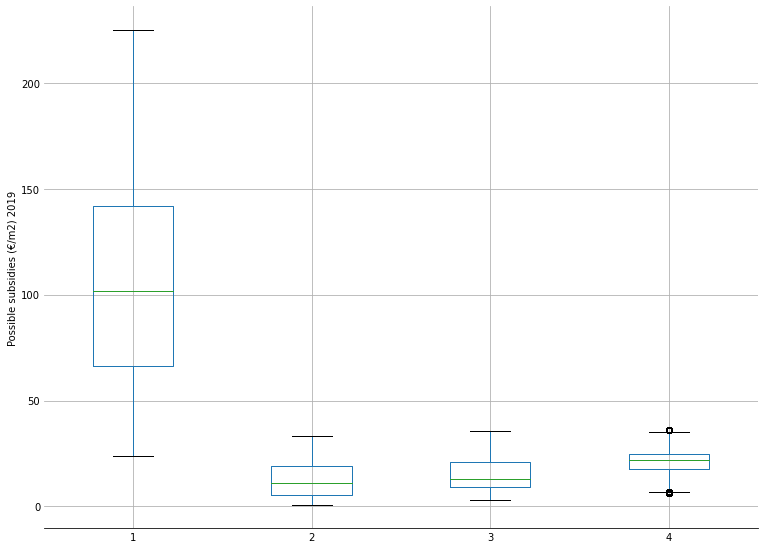

In [23]:
for yr in subsidies_detailed.keys():
    economic_boxplots(subsidies_detailed[yr], ylabel='Possible subsidies (€/m2) {}'.format(yr))
    break

In [24]:
a = subsidies_detailed[yr].index.names
subsidies_detailed[yr].index.names = a[:-1] + ['Energy performance final']

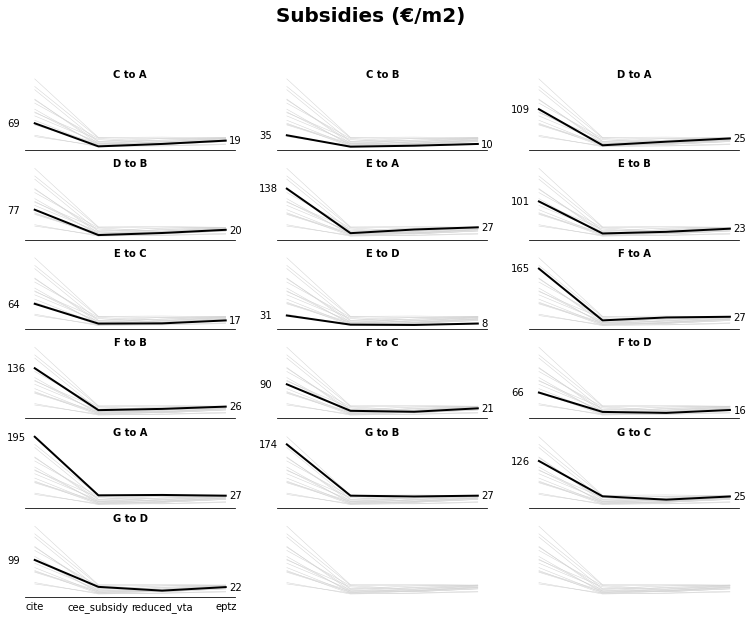

In [25]:
b = subsidies_detailed[yr].groupby(['Energy performance', 'Energy performance final']).mean()
economic_subplots(b, 'Subsidies (€/m2)',
                  format_axtitle=lambda x: '{} to {}'.format(x[0], x[1]), format_val=lambda x: '{:.0f}'.format(x))

### CO2 Cost

In [ ]:
co2_graph = pd.DataFrame()
co2_graph['Flow renovation'] = financials_euro['Flow renovation'] * 100000
co2_graph['Emission saving'] = financials_euro['Emission saving'] / 100000
co2_graph['CO2 investment cost'] = financials_euro['CO2 investment cost'] * 100000
co2_graph['CO2 private cost'] = financials_euro['CO2 private cost'] * 100000

In [ ]:
df_graph = co2_graph.sort_values('CO2 private cost').copy()
df_graph['CO2 Potential Emission'] = df_graph['Emission saving''].cumsum()
df_graph['Cumulated Housing number'] = df_graph['Housing number'].cumsum()


In [ ]:
financials_unit.tail()

In [ ]:
distribution_scatter(financials_unit, 'Total capex', 'Flow renovation', colors_dict,
                     xlabel='Total capex (€/m2)', ylabel='Renovation', level='Energy performance')

distribution_scatter(financials_unit, 'NPV', 'Flow renovation', colors_dict,
                     xlabel='Total capex (€/m2)', ylabel='Renovation', level='Energy performance')


## Interactive

### Interactive table

Interactive table that display information about a specific segment or segments (if multiple value passed).

Widget input:
(can choose one)
- df: financial_unit[year], financial_euro, segment
- yr: optional

(can choose multiple)
- Occupancy status: 
- Housing type: 
- Income class:
- Income class owner:
- Energy performance:
- Heating energy:
- Energy performance final:
- Heating energy final:

In [ ]:
# TODO: if occ=None --> return all
def select_segment(df, occ='Homeowners', housing='Multi-family', income='D5', performance_ini='F', energy_ini='Oil fuel',
                   performance_end='C', energy_end='Oil fuel'):
    # TODO: if one level is not passed, function must returns dataframe. Use multilevels function in old notebook.
    if 'Energy performance final' not in df.index.names:
        return df.xs(occ, level='Occupancy status', drop_level=False).\
            xs(housing, level='Housing type', drop_level=False).\
            xs(income, level='Income class', drop_level=False).\
            xs(performance_ini, level='Energy performance', drop_level=False).\
            xs(energy_ini, level='Heating energy', drop_level=False)
    else:
        return df.xs(occ, level='Occupancy status', drop_level=False).\
            xs(housing, level='Housing type', drop_level=False).\
            xs(income, level='Income class', drop_level=False).\
            xs(performance_ini, level='Energy performance', drop_level=False).\
            xs(energy_ini, level='Heating energy', drop_level=False).\
            xs(performance_end, level='Energy performance final', drop_level=False).\
            xs(energy_end, level='Heating energy final', drop_level=False)


In [ ]:
select_segment(financials_unit)

In [ ]:
import plotly.graph_objects as go
from ipywidgets import widgets

### Interactive grouped

## Public policies

In [ ]:
Each year, how many subsidies have been given 

## Multithreading

In [ ]:
from multiprocessing import Process
import time

In [ ]:
def test(i):
    for k in range(i):
        print(k)

In [ ]:
p1 = Process(target=test, args=(0, 500))
p2 = Process(target=test, args=(500, 1000))

In [ ]:
t1 = threading.Thread(target=test, args=(10,))
t2 = threading.Thread(target=test, args=(10,))

In [ ]:
t1.start()
t2.start()

Parameters sensitivy analysis:
- cost_invest
- cost_intangible
- nu 
- demolition_rate
- energy_prices 
- public_policies

Almost all need to make a new model calibration --> main_func need to be integrate calibration step
thread(main_func)
